In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math

/home/pepechuy/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/pepechuy/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv("Car_rental_clean.csv")
data

fuelType  rating  renterTripsTaken  reviewCount location.city  \
0     ELECTRIC    5.00                13           12       Seattle   
1     ELECTRIC    5.00                 2            1       Tijeras   
2       HYBRID    4.92                28           24   Albuquerque   
3     GASOLINE    5.00                21           20   Albuquerque   
4     GASOLINE    5.00                 3            1   Albuquerque   
...        ...     ...               ...          ...           ...   
5334  GASOLINE    5.00                 2            2      Mililani   
5335  GASOLINE    5.00                32           27      Honolulu   
5336    HYBRID    5.00                17           16          Aiea   
5337  GASOLINE    4.94                18           17        Kailua   
5338  GASOLINE    5.00                16           14        Kailua   

      location.latitude  location.longitude location.state  owner.id  \
0             47.449107         -122.308841             WA  12847615   
1             35.111060         -106.276551             NM  15621242   
2             35.127163         -106.566681             NM  10199256   
3             35.149726         -106.711425             NM   9365496   
4             35.208659         -106.601008             NM   3553565   
...                 ...                 ...            ...       ...   
5334          21.435401         -158.019400             HI   8836511   
5335          21.292950         -157.836856             HI   9794111   
5336          21.375507         -157.914919             HI   2754690   
5337          21.378719         -157.727816             HI  11313508   
5338          21.378040         -157.730000             HI  11313508   

      rate.daily vehicle.make        vehicle.model vehicle.type  vehicle.year  
0            135        Tesla              Model X          suv          2019  
1            190        Tesla              Model X          suv          2018  
2             35       Toyota                Prius          car          2012  
3             75         Ford              Mustang          car          2018  
4             47     Chrysler              Sebring          car          2010  
...          ...          ...                  ...          ...           ...  
5334          50       Nissan                Rogue          suv          2014  
5335          33    Chevrolet                Cruze          car          2017  
5336          49        Lexus  HS Mazda 2Mazda 50h          car          2010  
5337          35        smart               fortwo          car          2013  
5338          35        smart               fortwo          car          2013  

[5339 rows x 14 columns]

In [3]:
data.describe()

rating  renterTripsTaken  reviewCount  location.latitude  \
count  5339.000000       5339.000000  5339.000000        5339.000000   
mean      4.920453         36.631766    31.150403          35.579633   
std       0.182333         42.528680    35.620282           6.438336   
min       1.000000          1.000000     1.000000          21.272565   
25%       4.900000          8.000000     7.000000          30.472322   
50%       5.000000         21.000000    19.000000          35.511217   
75%       5.000000         49.000000    42.000000          40.000670   
max       5.000000        395.000000   321.000000          64.893610   

       location.longitude      owner.id   rate.daily  vehicle.year  
count         5339.000000  5.339000e+03  5339.000000   5339.000000  
mean           -99.805363  5.829449e+06    90.991759   2015.291815  
std             20.387466  4.503836e+06    90.109859      3.915541  
min           -158.165693  5.105000e+03    20.000000   1955.000000  
25%           -117.171065  1.821886e+06    44.000000   2013.000000  
50%            -96.043475  4.867754e+06    68.000000   2016.000000  
75%            -81.558578  9.380383e+06   109.000000   2018.000000  
max            -68.823637  1.576071e+07  1500.000000   2020.000000

In [4]:
for column in data.columns:
    unique_values = data[column].unique()
    unique_count = data[column].nunique()
    print(f'Column {column} has {unique_count} unique values:_________________________________________\n  {unique_values}\n')

Column fuelType has 4 unique values:_________________________________________
  ['ELECTRIC' 'HYBRID' 'GASOLINE' 'DIESEL']

Column rating has 80 unique values:_________________________________________
  [5.   4.92 4.42 4.9  4.76 4.95 4.7  4.88 4.5  4.67 4.72 4.85 4.82 4.8
 4.58 4.83 4.94 4.93 4.89 4.87 4.96 4.97 4.99 4.84 4.98 4.86 4.91 4.73
 4.74 4.77 4.51 4.75 4.63 4.78 4.81 4.79 4.69 3.86 4.66 4.48 4.6  4.71
 4.64 4.65 4.44 4.57 4.38 4.29 4.56 4.2  4.33 4.   4.17 4.37 4.41 4.55
 3.   4.68 4.61 4.53 4.62 4.59 2.   4.08 3.5  4.43 4.54 3.67 1.5  1.
 4.25 4.4  4.52 3.56 3.25 4.46 4.36 4.39 4.47 4.18]

Column renterTripsTaken has 237 unique values:_________________________________________
  [ 13   2  28  21   3  12   1  22  23  11  51  61   5  24   4  70  20  18
  63   9  27  52   8  34  94 134  40  15 152  37  81  60  41  29  42  88
  38  76  35  32  72  17  56  69  71  19  45  54  39  14  25   7  53   6
  59  26  47  30  58  33  10 128  91  64 271  73  62 139  36  99 159  82
  84  75 10

In [5]:
# INFORMACIÓN DE CADA RENTADOR

In [6]:
def barplot(df, variable):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=variable, palette='Set1', hue=variable, legend=False)
    plt.ylabel('Count')
    plt.title(f'Bar Chart of {variable}')
    plt.xticks(rotation=90)
    plt.show()

In [7]:
def multi_barplot(df, variables, n_rows):
    n_cols = min(3, len(variables))
    total_plots = len(variables)
    n_rows = min(n_rows, math.ceil(total_plots / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    
    for i, variable in enumerate(variables):
        sns.countplot(data=df, x=variable, palette='Set1', hue=variable, legend=False, ax=axes[i])
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'Bar Chart of {variable}')
        axes[i].tick_params(axis='x', rotation=90)
    
    for j in range(i+1, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [8]:
vars = ['fuelType','location.state',
             'vehicle.make','vehicle.type', 'vehicle.year']

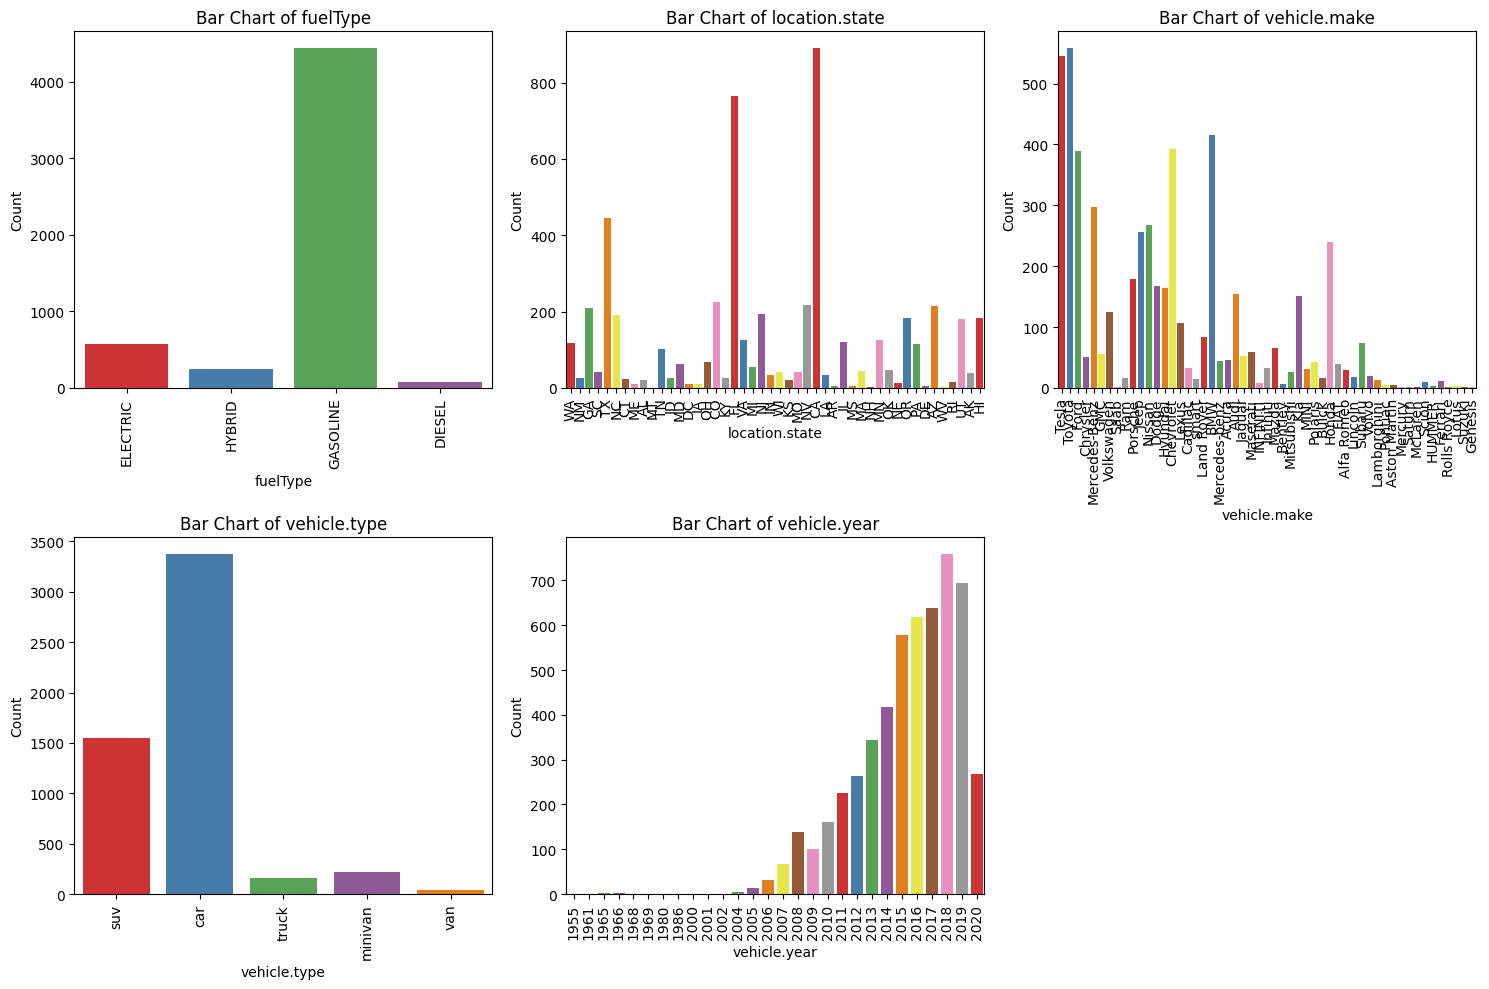

In [9]:
multi_barplot(data, vars, 2)

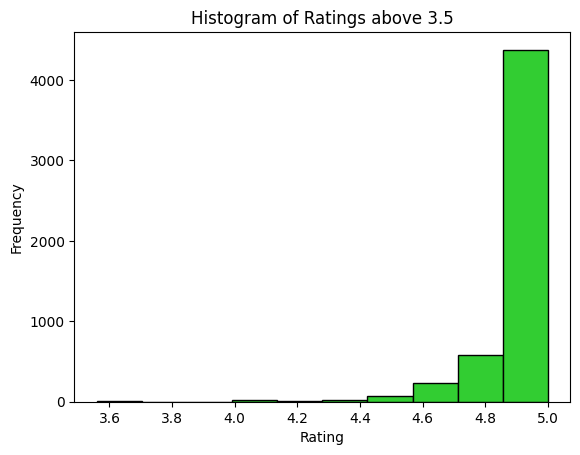

In [10]:
filtered_ratings = data['rating'][data['rating'] > 3.5].tolist()
plt.hist(filtered_ratings, bins=10, edgecolor='black', color='limegreen')
plt.title('Histogram of Ratings above 3.5')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [11]:
data.columns

Index(['fuelType', 'rating', 'renterTripsTaken', 'reviewCount',
       'location.city', 'location.latitude', 'location.longitude',
       'location.state', 'owner.id', 'rate.daily', 'vehicle.make',
       'vehicle.model', 'vehicle.type', 'vehicle.year'],
      dtype='object')

In [12]:
num_df = data.copy()
categorical_columns = num_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    num_df[col] = le.fit_transform(num_df[col])

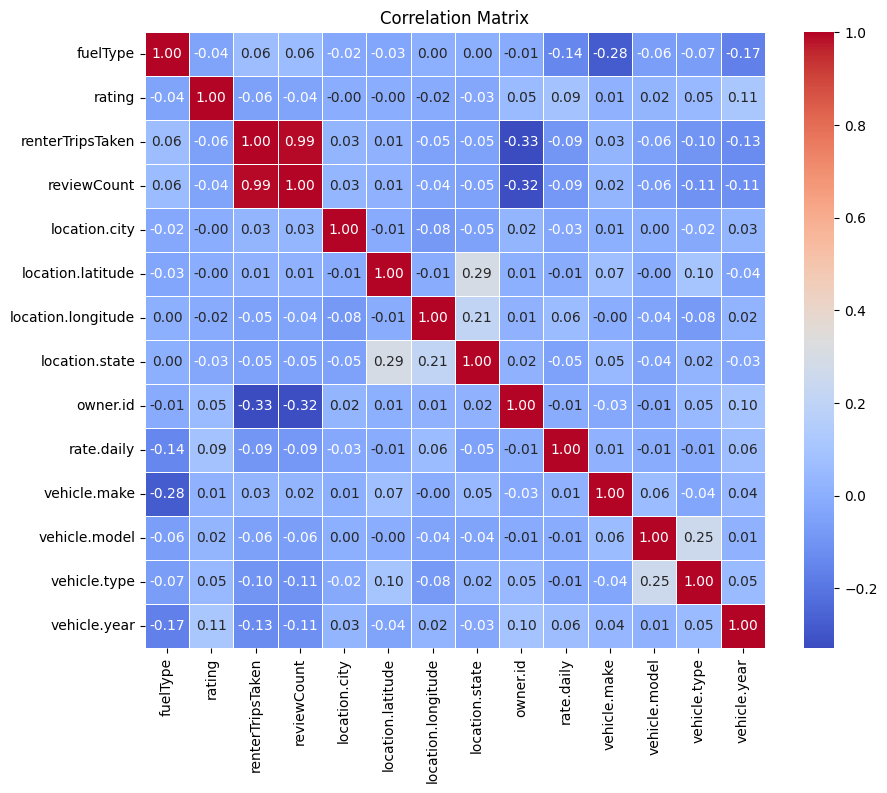

In [13]:
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


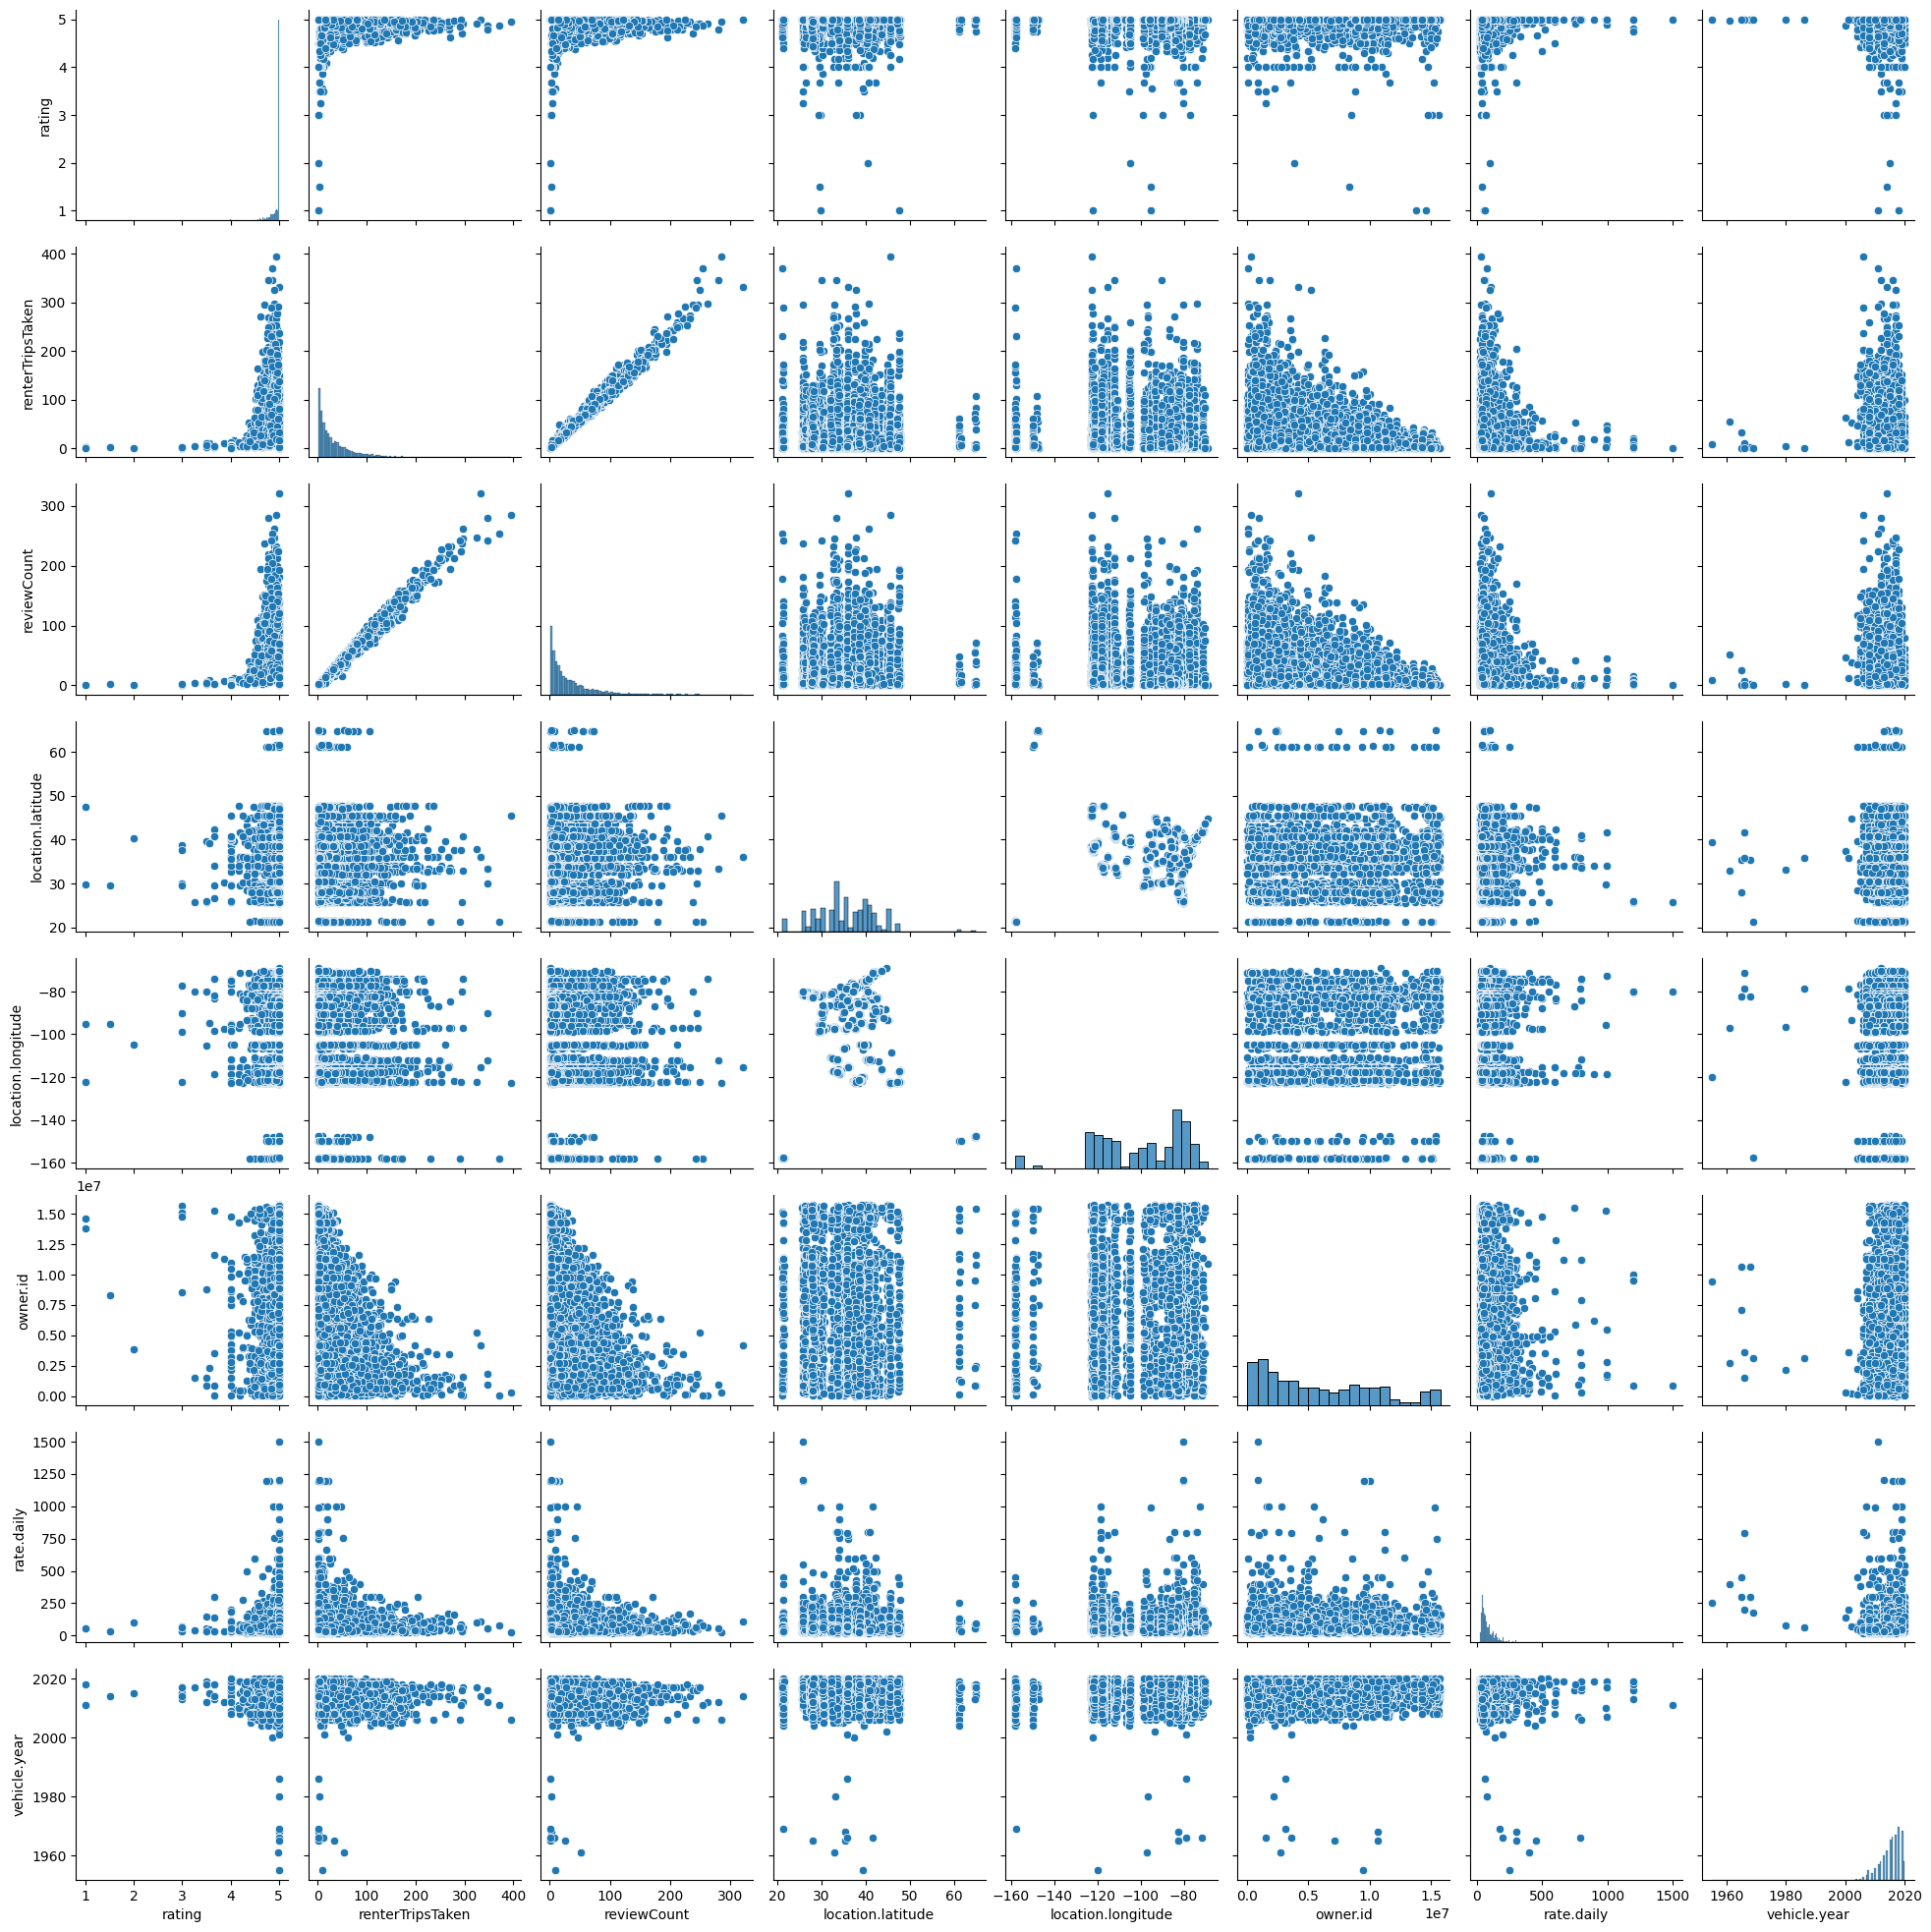

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
sns.pairplot(num_df)
plt.show()